# 8.01 VISUALIZACIONES EN PYTHON

## NIVEL 1
Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.
Realizarás una visualización para cada ejercicio. Comenta lo que te llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.

Con el siguiente comando podemos instalar el conector de MySQL en Jupyter Notebook para poder trabajar con bases de datos MySQL desde Python.

In [1]:
%pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mysql.connector as sql  #Aquí importamos la librería mysql.connector renombrándola como sql.

mydb= sql.connect(        #En este bloque establecemos la conexión, para ello necesitamos el host, user, contraseña y la base de datos en cuestión, en este caso sprint4.
    host= "localhost",
    user="root",
    password="cristina1234",
    database="sprint4")
print(mydb)

In [3]:
import pandas as pd               #Aquí importamos varias librerías de Python como Pandas, Matplotlib y Seaborn.
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

companies = pd.read_sql("SELECT * FROM companies", mydb)     #Aquí cargamos las tablas de sprint4.
credit_cards = pd.read_sql("SELECT * FROM credit_cards", mydb)
card_status = pd.read_sql("SELECT * FROM card_status", mydb)
products = pd.read_sql("SELECT * FROM products", mydb)
transaction_products = pd.read_sql("SELECT * FROM transaction_products", mydb)
transactions = pd.read_sql("SELECT * FROM transactions", mydb)
users = pd.read_sql("SELECT * FROM users", mydb)




C:\Users\crist\AppData\Local\Temp\ipykernel_8968\3394845467.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  companies = pd.read_sql("SELECT * FROM companies", mydb)     #Aquí cargamos las tablas de sprint4.
C:\Users\crist\AppData\Local\Temp\ipykernel_8968\3394845467.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  credit_cards = pd.read_sql("SELECT * FROM credit_cards", mydb)
C:\Users\crist\AppData\Local\Temp\ipykernel_8968\3394845467.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  card_status = pd.read_sql("SELE

Con este código podemos observar información general sobre el dataframe como sus entradas, filas, columnas, si hay valores nulos, el dtype es object, que es string. Después con head(10) me muestra las 10 primeras filas del df. Y haremos lo mismo con las demás tablas.

In [23]:
companies

,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings
...,...,...,...,...,...,...
95,b-2602,Placerat LLP,05 43 67 24 41,tellus.suspendisse@hotmail.org,Netherlands,https://zoom.us/sub
96,b-2606,Sed Est Corp.,04 58 02 37 91,tempor.bibendum@google.couk,Canada,https://instagram.com/sub/cars
97,b-2610,Egestas Nunc Sed Limited,06 01 02 70 47,vitae@hotmail.edu,Italy,https://walmart.com/one
98,b-2614,Rutrum Non Inc.,02 66 31 61 09,neque@protonmail.net,Germany,https://netflix.com/site


In [5]:

print(companies.info())  
companies.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_id    100 non-null    object
 1   company_name  100 non-null    object
 2   phone         100 non-null    object
 3   email         100 non-null    object
 4   country       100 non-null    object
 5   website       100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB
None


,company_id,company_name,phone,email,country,website
0,b-2222,Ac Fermentum Incorporated,06 85 56 52 33,donec.porttitor.tellus@yahoo.net,Germany,https://instagram.com/site
1,b-2226,Magna A Neque Industries,04 14 44 64 62,risus.donec.nibh@icloud.org,Australia,https://whatsapp.com/group/9
2,b-2230,Fusce Corp.,08 14 97 58 85,risus@protonmail.edu,United States,https://pinterest.com/sub/cars
3,b-2234,Convallis In Incorporated,06 66 57 29 50,mauris.ut@aol.couk,Germany,https://cnn.com/user/110
4,b-2238,Ante Iaculis Nec Foundation,08 23 04 99 53,sed.dictum.proin@outlook.ca,New Zealand,https://netflix.com/settings
5,b-2242,Donec Ltd,01 25 51 37 37,at.iaculis@hotmail.couk,Norway,https://nytimes.com/user/110
6,b-2246,Sed Nunc Ltd,02 62 64 73 48,nibh@yahoo.org,United Kingdom,https://cnn.com/one
7,b-2250,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars
8,b-2254,Nascetur Ridiculus Mus Inc.,06 26 87 61 84,suspendisse.dui@icloud.net,United States,https://ebay.com/sub
9,b-2258,Vestibulum Lorem PC,02 02 87 33 40,aenean.massa.integer@aol.net,Belgium,https://pinterest.com/sub/cars


In [6]:
print(credit_cards.info())
credit_cards.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             275 non-null    object
 1   user_id        275 non-null    object
 2   iban           275 non-null    object
 3   pan            275 non-null    object
 4   pin            275 non-null    object
 5   cvv            275 non-null    object
 6   track1         275 non-null    object
 7   track2         275 non-null    object
 8   expiring_date  275 non-null    object
dtypes: object(9)
memory usage: 19.5+ KB
None


,id,user_id,iban,pan,pin,cvv,track1,track2,expiring_date
0,CcU-2938,275,TR301950312213576817638661,5424465566813633,3257,984,%B8383712448554646^WovsxejDpwiev^86041142?7,%B7653863056044187=8007163336?3,10/30/22
1,CcU-2945,274,DO26854763748537475216568689,5142423821948828,9080,887,%B4621311609958661^UftuyfsSeimxn^0610628241?7,%B4149568437843501=5107140330?1,08/24/23
2,CcU-2952,273,BG45IVQL52710525608255,4556 453 55 5287,4598,438,%B2183285104307501^CddyytcUxwfdq^5907955430?9,%B6778580257827162=69068597400?7,06/29/21
3,CcU-2959,272,CR7242477244335841535,372461377349375,3583,667,%B7281111956795320^XocddijBckecd^09016253?3,%B4246154489281853=2805223916?8,02/24/23
4,CcU-2966,271,BG72LKTQ15627628377363,448566 886747 7265,4900,130,%B4728932322756223^JhlgvsuFbmwgj^72022894943?7,%B2318571115599881=8908215784?5,10/29/24
5,CcU-2973,270,PT87806228135092429456346,544 58654 54343 384,8760,887,%B4761405253275637^HjnnipoBlejrl^7108515632?1,%B7816169831446746=13102772?9,01/30/25
6,CcU-2980,269,DE39241881883086277136,402400 7145845969,5075,596,%B7320483593870549^OokzqxrHpased^49017394?3,%B2474313962214151=0412219131?5,07/24/22
7,CcU-2987,268,GE89681434837748781813,3763 747687 76666,2298,797,%B4750646345146674^PjmlyrfGwwtrf^83051712?6,%B5441935173418615=4103704536?7,10/31/23
8,CcU-2994,267,BH62714428368066765294,344283273252593,7545,595,%B1583759784015674^GmqoyhtUtoqrn^25078511?7,%B4141467473024349=65068009550?4,02/28/22
9,CcU-3001,266,CY49087426654774581266832110,511722 924833 2244,9562,867,%B6227288756728648^AwxilfcFmgvdy^2808804611?8,%B3429355750963453=5305268305?3,09/16/22


In [7]:
print(products.info())
products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            100 non-null    object 
 1   product_name  100 non-null    object 
 2   price         100 non-null    object 
 3   colour        100 non-null    object 
 4   weight        100 non-null    float64
 5   warehouse_id  100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.8+ KB
None


,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,$161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,$119.52,#f4f4f4,2.4,WH--5
2,100,south duel,$40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,$49.70,#141414,2.7,WH--6
4,12,duel Direwolf,$181.60,#a8a8a8,2.1,WH--7
5,13,palpatine chewbacca,$139.59,#2b2b2b,1.0,WH--8
6,14,Direwolf,$147.53,#c4c4c4,2.0,WH--9
7,15,Stannis warden,$194.29,#dbdbdb,1.5,WH--10
8,16,the duel warden,$180.91,#666666,3.0,WH--11
9,17,skywalker ewok sith,$91.89,#7c7c7c,3.2,WH--12


In [8]:
print(transactions.info())
transactions.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           587 non-null    object        
 1   card_id      587 non-null    object        
 2   business_id  587 non-null    object        
 3   timestamp    587 non-null    datetime64[ns]
 4   amount       587 non-null    float64       
 5   declined     587 non-null    object        
 6   product_ids  587 non-null    object        
 7   user_id      587 non-null    object        
 8   lat          587 non-null    object        
 9   longitude    587 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 46.0+ KB
None


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9184589824,-12.5275561984
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9694885888,-117.5251835904
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.222680576,-129.049879552
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.3593055232,-100.555928064
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.7381445632,158.298210304
5,07A46D48-31A3-7E87-65B9-0DA902AD109F,CcU-3225,b-2386,2021-06-28 21:11:42,340.87,1,"47, 23",272,38.8341526528,92.190545408
6,09DE92CE-6F27-2BB7-13B5-9385B2B3B8E2,CcU-3071,b-2298,2021-05-11 20:40:06,303.05,1,"67, 7",275,71.1705612288,10.5756752896
7,0A476ED9-0C13-1962-F87B-D3563924B539,CcU-4359,b-2302,2022-02-26 20:33:54,430.49,0,"29, 41, 11",221,-56.490077696,114.8012315648
8,0BEB80B7-9D66-1707-CE4B-9DC7E71914B5,CcU-3141,b-2338,2022-03-04 14:54:35,288.81,1,"19, 41, 29, 3",272,23.3264027648,-13.6036868096
9,0C7C3A33-9947-3BC1-846D-7BE3D0D17598,CcU-3309,b-2434,2021-04-10 20:58:41,103.44,1,"89, 31",272,63.3614763008,-68.6666633216


In [9]:
print(users.info())
users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           275 non-null    object
 1   name         275 non-null    object
 2   surname      275 non-null    object
 3   phone        275 non-null    object
 4   email        275 non-null    object
 5   birth_date   275 non-null    object
 6   country      275 non-null    object
 7   city         275 non-null    object
 8   postal_code  275 non-null    object
 9   address      275 non-null    object
dtypes: object(10)
memory usage: 21.6+ KB
None


,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,1,Zeus,Gamble,1-282-581-0551,interdum.enim@protonmail.edu,"Nov 17, 1985",United States,Lowell,73544,348-7818 Sagittis St.
1,10,Robert,Mccarthy,(324) 746-6771,fermentum@protonmail.com,"Apr 30, 1984",United States,Eugene,85526,"P.O. Box 773, 3594 Ornare St."
2,100,Melodie,Mclean,1-677-221-7152,risus.varius@google.ca,"Sep 15, 1989",United States,College,11838,Ap #644-8492 Sagittis St.
3,101,Sarah,Beck,(358) 691-4345,vitae.risus@aol.couk,"Apr 9, 1983",United States,Great Falls,67129,"665-9047 In, Rd."
4,102,Jasper,Landry,1-397-765-1118,consectetuer.euismod@aol.org,"Apr 16, 1982",United States,Columbus,11595,Ap #374-7325 Sodales Rd.
5,103,Upton,Chavez,(227) 785-6484,euismod.est@aol.ca,"Mar 15, 1986",United States,Essex,95631,"1990 Vel, Av."
6,104,Martha,Barlow,(732) 326-5448,vulputate@hotmail.net,"Oct 29, 1988",United States,Chicago,41512,Ap #311-7103 In Avenue
7,105,Hashim,Rose,(858) 313-6727,urna@icloud.com,"Mar 28, 1983",United States,Tacoma,99632,"8034 Tortor, Road"
8,106,Tanner,Valenzuela,1-346-421-3135,nascetur.ridiculus@google.net,"Apr 6, 1993",United States,Naperville,31130,Ap #114-2616 Fusce Road
9,107,Victor,Valencia,(239) 569-1938,non.enim@hotmail.couk,"May 1, 1998",United States,Warren,15158,Ap #182-9926 At St.


In [10]:
print(transaction_products.info())
transaction_products.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1457 non-null   object
 1   product_id      1457 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB
None


,transaction_id,product_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,19
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,1
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,71
3,0466A42E-47CF-8D24-FD01-C0B689713128,43
4,0466A42E-47CF-8D24-FD01-C0B689713128,97
5,0466A42E-47CF-8D24-FD01-C0B689713128,47
6,063FBA79-99EC-66FB-29F7-25726D1764A5,5
7,063FBA79-99EC-66FB-29F7-25726D1764A5,31
8,063FBA79-99EC-66FB-29F7-25726D1764A5,67
9,063FBA79-99EC-66FB-29F7-25726D1764A5,47


In [11]:
print(card_status.info())
card_status.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  275 non-null    object
 1   status   275 non-null    object
dtypes: object(2)
memory usage: 4.4+ KB
None


,card_id,status
0,CcU-2938,Activa
1,CcU-2945,Activa
2,CcU-2952,Activa
3,CcU-2959,Activa
4,CcU-2966,Activa
5,CcU-2973,Activa
6,CcU-2980,Activa
7,CcU-2987,Activa
8,CcU-2994,Activa
9,CcU-3001,Activa


## Ejercicio 1
### Una variable numèrica.

En este caso se usa un histograma con la variable "amount" de la tabla "transactions". Las barras representan la frecuencia de cada rango del monto, también se incluye una línea KDE que ayuda a visualizar mejor la forma general de la distribución. 

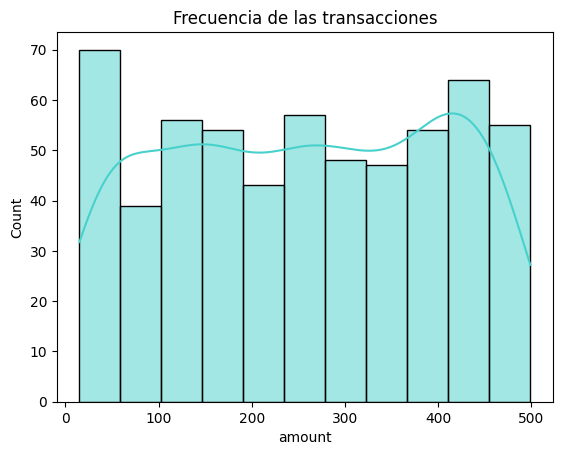

In [12]:

import pandas as pd               
import matplotlib.pyplot as plt
import seaborn as sns
aqua_palette = ["#00FFFF", "#00CED1", "#20B2AA", "#40E0D0", "#48D1CC", "#5F9EA0"]
sns.histplot(data=transactions, x='amount', kde=True, color=aqua_palette[4]) 
plt.title("Frecuencia de las transacciones")
plt.show();


Interpretación del gráfico:

En este gráfico de distribución de transacciones, observamos que el mayor número de transacciones se encuentra en el rango de montos bajos, específicamente cerca de 70 transacciones para valores menores a 100. A medida que el monto aumenta, la cantidad de transacciones se mantiene relativamente estable en un nivel intermedio, alrededor de las 50 transacciones. La línea en este caso acqua de densidad (kde) refuerza esta tendencia, mostrando que aunque hay transacciones en varios niveles de monto, la mayoría ocurre en rangos más bajos. Además, destaca un pico secundario entre 400 y 450, donde el número de transacciones alcanza las 60 antes de empezar a descender. Esto indica una preferencia de los usuarios por transacciones de montos menores, que ocurren con mayor frecuencia en comparación con los montos altos.

## Ejercicio 2
### Dos variables numéricas

En este código para trabajar con dos variables numéricas, he escogido el precio en el eje de las X y el peso en el eje de las Y de la tabla "products". Pero, antes de poder trabajar con el precio debo eliminar el símbolo del dólar, para ello uso el método 
.str.replace, que elimina el simbolo del dolar y lo remplaza por una cadena vacía dejando solo el número. Después, convierte esos números de texto a valores decimales con el método .astype. a float.

In [13]:
products['price'] = products['price'].str.replace('$', '')    
products['price'] = products['price'].astype('float')

In [14]:
products

,id,product_name,price,colour,weight,warehouse_id
0,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4
1,10,Karstark Dorne,119.52,#f4f4f4,2.4,WH--5
2,100,south duel,40.43,#6d6d6d,3.0,WH--95
3,11,Karstark Dorne,49.70,#141414,2.7,WH--6
4,12,duel Direwolf,181.60,#a8a8a8,2.1,WH--7
...,...,...,...,...,...,...
95,95,riverlands north Direwolf,6.90,#c1c1c1,2.7,WH--90
96,96,dooku solo,20.92,#282828,2.1,WH--91
97,97,jinn Winterfell,65.25,#bababa,1.0,WH--92
98,98,Direwolf Littlefinger,38.33,#bababa,2.0,WH--93


In [15]:
products.dtypes  #así visualizamos el tipo de variable de cada tabla

id               object
product_name     object
price           float64
colour           object
weight          float64
warehouse_id     object
dtype: object

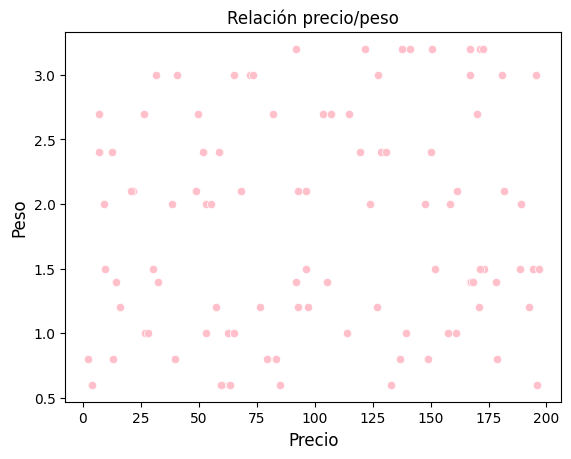

In [16]:
sns.scatterplot(data=products,
            x='price',
            y='weight',
            color="pink",
            sizes=(20, 200))
plt.xlabel('Precio', fontsize=12)
plt.ylabel('Peso', fontsize=12)
plt.title("Relación precio/peso");


Interpretación del gráfico:

Este gráfico de dispersión muestra la relación entre el peso y el precio de productos. En el eje X se encuentran los precios, que van desde 0 hasta 200, mientras que en el eje Y están los pesos, desde 0.5 hasta 3.5 aprox.

Observamos que los puntos están distribuidos en varios niveles de peso sin seguir un patrón claro en relación con el precio, lo que sugiere que el peso no parece tener una correlación directa con el precio. Llama la atención un vacío en el gráfico o falta de productos que pesen entre 1.5 o 2.0 independientemente del precio.

## Ejercicio 3
### Una variable categórica.


En este caso para graficar una variable categórica he escogido de la tabla "companies"  la columna "country" y llamo a un gráfico de barras de Seaborn para visualizar el conteo de empresas por país.

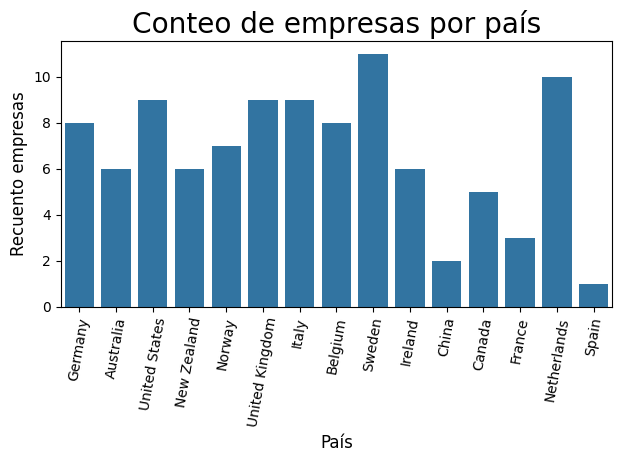

In [17]:

sns.countplot(data=companies, x='country') 
plt.style.use('fivethirtyeight')
plt.title("Conteo de empresas por país")
plt.xticks(rotation=80) #rotamos las etiquetas del eje X 55 grados para facilitar la lectura porque sino se amontonan.
plt.tight_layout() #prevenimos que las etiquetas o el título se solapen y se vea ordenado.
plt.xlabel('País', fontsize=12)
plt.ylabel('Recuento empresas', fontsize=12)
plt.show()

Interpretación del gráfico:

El gráfico de barras muestra el conteo de empresas por país, revelando que algunos países tienen una presencia empresarial más fuerte que otros. Por ejemplo, Suecia y los Países Bajos destacan con 11 y 10 empresas respectivamente, mientras que España y China tienen solo 1 y 2. Otros países como Canadá, Noruega y un grupo que incluye Australia, Irlanda y Nueva Zelanda, tienen entre 5 y 7 empresas, indicando una mayor concentración empresarial. Además, Italia, Reino Unido y Estados Unidos se agrupan con 9 empresas, por lo que podemos concluir que tienen un perfil empresarial más similar. 

Es fundamental abordar estos desequilibrios mediante estrategias específicas que impulsen la participación en los países con un rendimiento bajo, mientras se preservan y optimizan las prácticas efectivas en las naciones con alta participación. Esto facilitará una distribución más equitativa y sostenible de las transacciones a nivel global para la empresa. Se sugiere llevar a cabo un análisis de mercado para identificar las barreras que enfrentan las empresas en España y China, así como desarrollar programas de incentivos destinados a atraer a más empresas en estos países e incrementar las inversiones en campañas de marketing.

## Ejercicio 4
### Una variable categórica y una numérica.

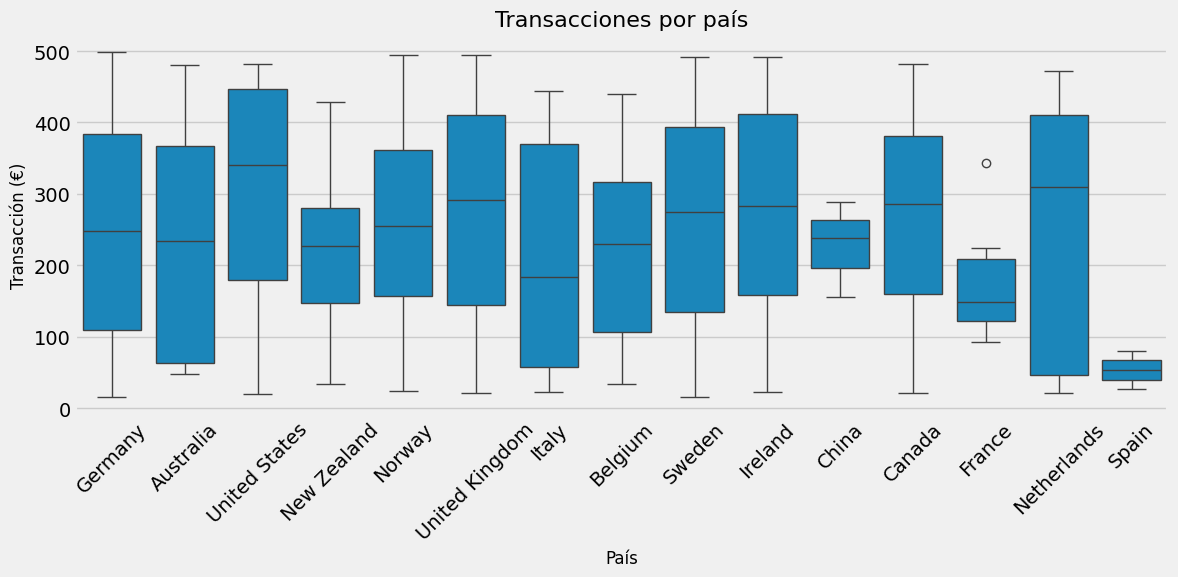

In [18]:
df_mix = pd.merge(companies, transactions, left_on='company_id', right_on='business_id') 
#realizamos un método merge que es como un join en mysql para relacionar tablas entre sí.
plt.figure(figsize=(12, 6))                                                                   
sns.boxplot(x='country', y='amount', data=df_mix)                                       
plt.title('Transacciones por país', fontsize=16)                                   
plt.xlabel('País', fontsize=12)
plt.ylabel('Transacción (€)', fontsize=12)
plt.xticks(rotation=45)                                                                        
plt.tight_layout()                                                                             
plt.show();

Interpretación del gráfico:

En este gráfico boxplot o de bigotes, observarmos cómo se distribuyen las transacciones a nivel internacional. En el eje de las X contamos con 15 países que poseen actividad transaccional. Estados Unidos se destaca como el país con la mediana más alta, alcanzando alrededor de 345€, mientras que España presenta la mediana más baja, cercana a los 55€. Si analizamos los tres países con las medianas más elevadas (Estados Unidos, Reino Unido y Países Bajos) en comparación con los de menor mediana (España, Francia e Italia), se puede inferir que los países del sur tienden a registrar transacciones considerablemente menores que aquellos del norte. Esta tendencia podría explicarse por diversos factores (aspectos culturales, geográficos, económicos y políticos). También se identifica un valor atípico en el caso de Francia, donde una transacción asciende a aproximadamente 350€, rompiendo con la tendencia general. En cuanto a la dispersión, los países con menor variabilidad en sus transacciones son España, Francia y China. Interpretando estas transacciones como el consumo por nación, sería posible desarrollar políticas que fomenten un aumento del consumo en los países con cifras más bajas. Por ejemplo, para elevar tanto el valor como la cantidad de transacciones en España, sería útil llevar a cabo un estudio sobre los hábitos de compra de los consumidores, identificar los productos más demandados, realizar un análisis de la competencia y hacer comparaciones con países que presenten características similares. Por otro lado, para mantener el nivel de transacciones en Estados Unidos, podrían establecerse estrategias orientadas al mantenimiento del consumo, tales como bonificaciones, programas de fidelización o descuentos.

## Ejercicio 5
### Dos variables categóricas.

           country  count
0        Australia      6
1          Belgium      5
2           Canada      4
3            China      1
4           France      3
5          Germany      7
6          Ireland      6
7            Italy      8
8      Netherlands      8
9      New Zealand      5
10          Norway      7
11           Spain      1
12          Sweden     11
13  United Kingdom      7
14   United States      8


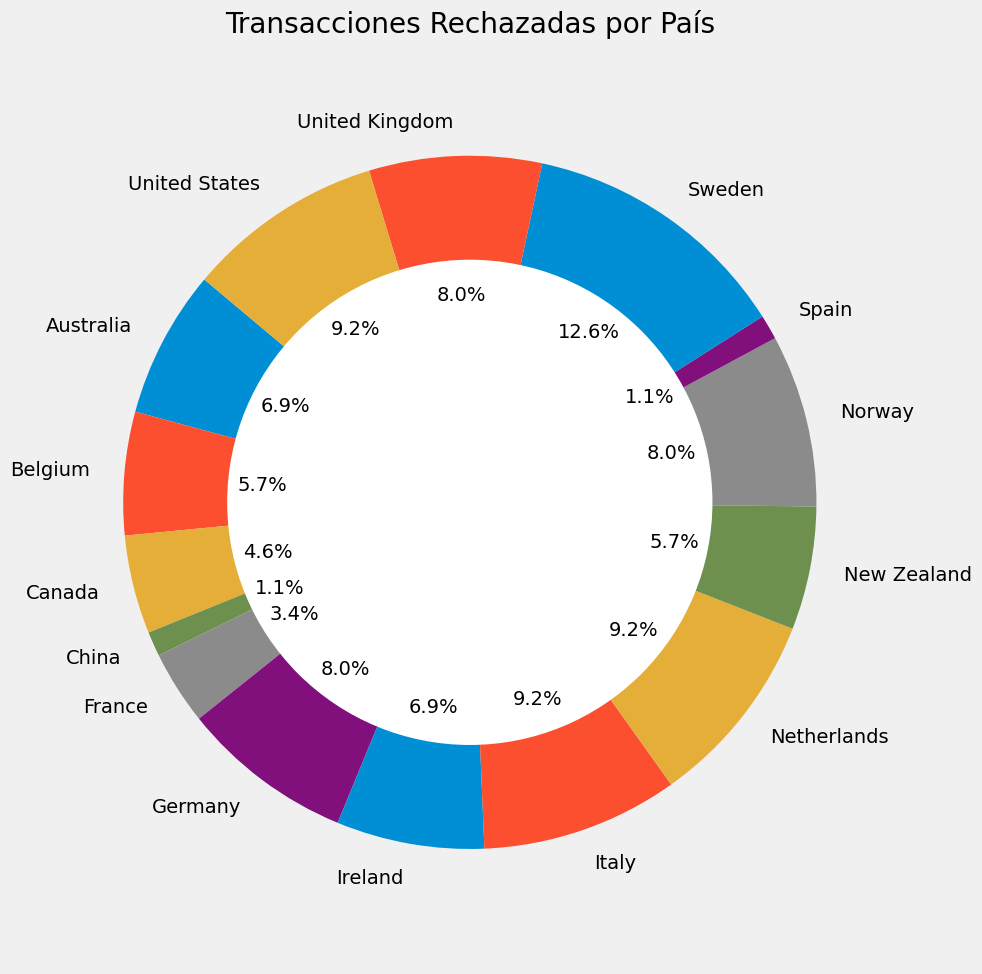

In [19]:
# Convertir 'declined' en categórica
df_mix['declined'] = df_mix['declined'].astype(int)  # Asegúrate de que sea un entero
df_mix['estado_transaccion'] = df_mix['declined'].map({0: 'Aprobada', 1: 'Rechazada'}).astype('category')

# Contar transacciones rechazadas por país
transacciones_rechazadas = df_mix[df_mix['declined'] == 1].groupby('country').size().reset_index(name='count')

# Mostrar el conteo de transacciones rechazadas por país
print(transacciones_rechazadas)

# Gráfico pie chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.pie(transacciones_rechazadas['count'], labels=transacciones_rechazadas['country'], autopct='%1.1f%%', startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')  # Círculo central para crear el efecto de dona
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Transacciones Rechazadas por País')
plt.axis('equal') 
plt.tight_layout()

plt.show();

In [20]:
print(plt.style.available) #Aquí solo quería mirar más estilos.

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Interpretación del gráfico:

En este gráfico de pastel, se analiza la distribución de las transacciones declinadas registradas por país, utilizando como variables categóricas el país y el estado de sus transacciones.

Se observa que Suecia presenta el mayor porcentaje de transacciones rechazadas, alcanzando un 12.6%. Esto indica la necesidad de investigar posibles problemas en los sistemas de pago o en las políticas de verificación. Se recomienda optimizar los métodos de pago aceptados y las políticas de validación para reducir este índice de rechazo. Por otro lado, los Países Bajos, Italia y Estados Unidos también muestran un porcentaje significativo del 9.2%, lo que sugiere que sería beneficioso revisar los criterios de rechazo de estas transacciones. Irlanda y Alemania tienen un 6.9% de transacciones rechazadas, lo que requiere atención para prevenir futuros aumentos. Bélgica y Canadá, con tasas de 5.7% y 4.6% respectivamente, indican que hay oportunidades de mejora.

Finalmente, aunque España y China presentan las tasas más bajas de transacciones declinadas, es importante tener en cuenta que son países con un volumen reducido de transacciones y que deben abordar varios aspectos para lograr un crecimiento empresarial más equilibrado en comparación con el resto de los países.



## Ejercicio 6
### Tres variables.

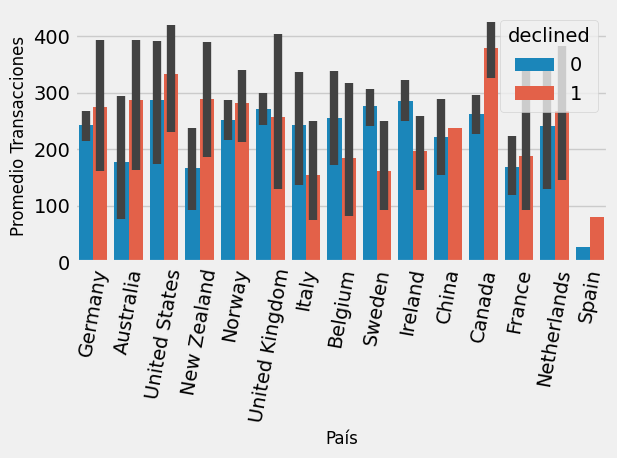

In [24]:
#barplot te da el amount del país
#vuelvo a poner el merge porque en el ejercicio anterior he modificado el df_mix
df_1 = pd.merge(companies, transactions, left_on='company_id', right_on='business_id')
sns.barplot(data=df_1,
            x='country',
            y='amount',
            hue='declined')
plt.xlabel('País', fontsize=12)
plt.ylabel('Promedio Transacciones', fontsize=12)
plt.xticks(rotation=80)
plt.tight_layout(); 

Interpretación del gráfico:


En este gráfico de barras, se presenta la media de los montos de las transacciones aprobadas y rechazadas por país. Para ello, se han fusionado dos conjuntos de datos: uno que contiene información sobre las empresas y otro que registra las transacciones realizadas. Esta combinación permite visualizar el monto total de las transacciones en cada país, diferenciando entre las aprobadas y las rechazadas. Las barras de error, representadas en color negro, indican la variabilidad de los datos, mostrando las desviaciones estándar o la incertidumbre asociada.

De los 15 países analizados, 9 presentan un promedio de transacciones rechazadas superior al de las aprobadas. Por ejemplo, en Canadá se registran aproximadamente 375 transacciones declinadas y 250 aprobadas, mientras que en EE. UU. hay alrededor de 325 transacciones rechazadas y más de 250 aprobadas. La discrepancia es aún más notable en Nueva Zelanda y Australia, donde el número de transacciones rechazadas supera las 250, mientras que las aprobadas apenas alcanzan las 170. Por otro lado, España destaca por tener menos de 100 transacciones en total, con menos de 25 aprobadas.

Para mejorar esta situación, es fundamental que las empresas realicen un análisis más profundo de los factores que contribuyen a las transacciones rechazadas. Se recomienda revisar las políticas de validación y los métodos de pago aceptados para identificar posibles áreas de mejora. Implementar auditorías del sistema de pagos y realizar encuestas de satisfacción al cliente puede proporcionar información valiosa sobre cómo optimizar los procesos y minimizar los rechazos. 



## Ejercicio 7
### Graficar un Pairplot.

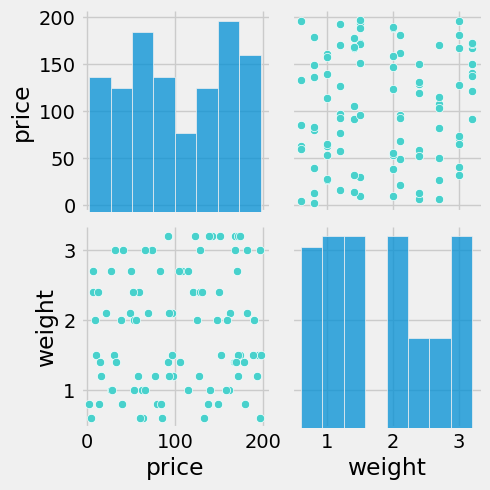

In [22]:
sns.pairplot(data=products, plot_kws={'color': aqua_palette[4]})
plt.show();


Interpretación del gráfico:

Los gráficos de dispersión se encuentran en la parte inferior izquierda y en la parte superior derecha.
Muestran la relación entre el precio y el peso de los productos. Los puntos están distribuidos en varios niveles de peso sin seguir un patrón claro en relación con el precio, lo que sugiere que el peso no parece tener una correlación directa con el precio.

El gráfico en la esquina superior izquierda ilustra la distribución de precios. Existen dos rangos de precios predominantes entre los productos: uno de precios bajos y otro de precios más altos. La mayoría de los precios se concentran en el intervalo de 0 a 200, con algunos valores en un rango medio; sin embargo, los picos en los extremos representan las dos categorías de precios más habituales.

Finalmente, el gráfico en la esquina inferior derecha presenta la distribución del peso de los productos. En este caso, se observa una distribución más normal, donde la mayoría de los productos pesa entre 1.5 y 2.5 kilogramos. Se identifican pocos productos que pesen menos de 1 kg o más de 3 kg, lo que sugiere que la mayoría tiene un peso moderado. La determinación de precios parece estar más influenciada por otros elementos que deben investigarse  a futuro como la calidad del producto, la marca o la funcionalidad.